In [12]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Read file

# Define the relative path to the CSV file
file_path = '..\\data\\raw\\NHANES_age_prediction.csv'

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path)
    print(df.head())
except Exception as e:
    print(f"An error occurred: {e}")

      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92  


In [5]:
# Split the data into features and target variable
X = df.drop(columns=['age_group'])
y = df['age_group']

In [22]:
# Rename columns for clarity and check for missing values
X.rename(columns={
    'SEQN': 'ID',
    'RIDAGEYR': 'Age',
    'RIAGENDR': 'Gender',
    'PAQ605': 'Physical_Activity',
    'BMXBMI': 'BMI',
    'LBXGLU': 'Glucose_Level',
    'DIQ010': 'Diabetes_Status',
    'LBXGLT': 'Oral_Glucose_Test',
    'LBXIN': 'Insulin_Level'}, inplace=True)

print(X.isnull().sum())
print(f'Age Group            {y.isnull().sum()}')

ID                   0
Age                  0
Gender               0
Physical_Activity    0
BMI                  0
Glucose_Level        0
Diabetes_Status      0
Oral_Glucose_Test    0
Insulin_Level        0
dtype: int64
Age Group            0


In [28]:
# check for impossible negative values
(X < 0).sum()

ID                   0
Age                  0
Gender               0
Physical_Activity    0
BMI                  0
Glucose_Level        0
Diabetes_Status      0
Oral_Glucose_Test    0
Insulin_Level        0
dtype: int64

In [33]:
# change the physical activity where it is 7 to a 2
X['Physical_Activity'] = X['Physical_Activity'].replace(7, 2)

# get description of data
print(X.describe())

                 ID          Age       Gender  Physical_Activity          BMI  \
count   2278.000000  2278.000000  2278.000000        2278.000000  2278.000000   
mean   78691.853819    41.795874     1.511414           1.820457    27.955180   
std     2921.365151    20.156111     0.499979           0.383891     7.248962   
min    73564.000000    12.000000     1.000000           1.000000    14.500000   
25%    76171.750000    24.000000     1.000000           2.000000    22.800000   
50%    78749.000000    41.000000     2.000000           2.000000    26.800000   
75%    81213.500000    58.000000     2.000000           2.000000    31.200000   
max    83727.000000    80.000000     2.000000           2.000000    70.100000   

       Glucose_Level  Diabetes_Status  Oral_Glucose_Test  Insulin_Level  
count    2278.000000      2278.000000        2278.000000    2278.000000  
mean       99.553117         2.016242         114.978929      11.834794  
std        17.889834         0.185556          4

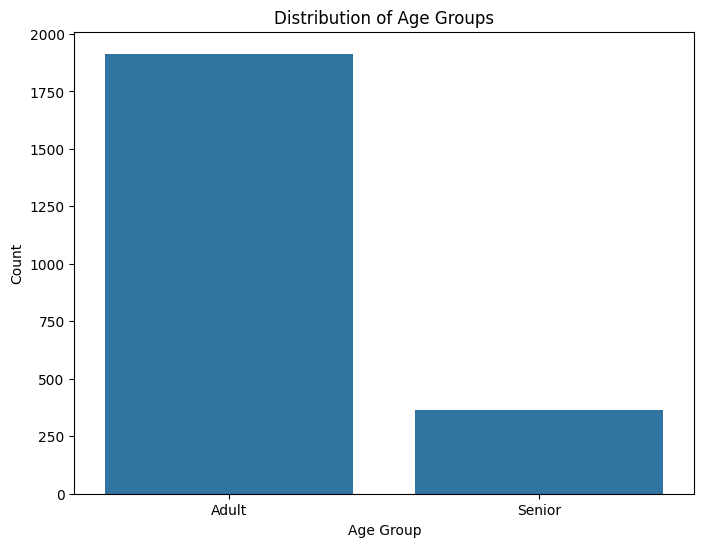

In [ ]:
# graph the target variable to test for imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
# this is pretty unbalanced so we will have to stratify when we split the data later!
# split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1001)
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set class distribution:")
print(y_test.value_counts(normalize=True))

Training set class distribution:
age_group
Adult     0.840285
Senior    0.159715
Name: proportion, dtype: float64

Testing set class distribution:
age_group
Adult     0.839912
Senior    0.160088
Name: proportion, dtype: float64


In [ ]:
# calculate permutation importance
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10)
importance = result.importances_mean